In [29]:
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkit
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import datetime

In [101]:
# 1km
nx=24576
ny=24576

with open('snow/IMS1kmLats.24576x24576x1.double', 'rb') as f:
    data = np.fromfile(f, dtype='<d', count=nx*ny)
    lats = np.reshape(data, [nx, ny], order='F')

with open('snow/IMS1kmLons.24576x24576x1.double', 'rb') as f:
    data = np.fromfile(f, dtype='<d', count=nx*ny)
    lons = np.reshape(data, [nx, ny], order='F')

lons=lons+90.

widths=np.full((nx), 1, dtype=int).tolist()
data=np.array(pd.read_fwf('snow/ims2017313_1km_v1.3.asc', \
                          skiprows=30, widths=widths, lineterminator='\n', header=None))

#Subset the data which are too big
min_ind_lons=11000
max_ind_lons=19000
min_ind_lats=9000
max_ind_lats=17000

lats_subset=lats[min_ind_lats:max_ind_lats,min_ind_lons:max_ind_lons]
lons_subset=lons[min_ind_lats:max_ind_lats,min_ind_lons:max_ind_lons]
data_subset=data[min_ind_lats:max_ind_lats,min_ind_lons:max_ind_lons]

In [68]:
# 4km
nx=6144
ny=6144

with open('snow/imslat_4km.bin', 'rb') as f:
    data = np.fromfile(f, dtype='<f', count=nx*ny)
    lats = np.reshape(data, [nx, ny], order='F')

with open('snow/imslon_4km.bin', 'rb') as f:
    data = np.fromfile(f, dtype='<f', count=nx*ny)
    lons = np.reshape(data, [nx, ny], order='F')

lons=lons+90. 
#For some weird reason...

widths=np.full((nx), 1, dtype=int).tolist()
data=np.array(pd.read_fwf('snow/ims2017311_4km_v1.3.asc', skiprows=30,\
                          widths=widths, lineterminator='\n', header=None))

In [ ]:
plt.close()

# DEFAULT
bmap = Basemap(projection="npstere", lon_0=280, lat_0=90, boundinglat=0,\
               rsphere=6378160.0, ellps="WGS84",k_0=0.9330127018922193)
bmap = Basemap(projection="stere", lon_0=20, lat_0=55, boundinglat=0,\
                rsphere=6378160.0, ellps="WGS84",k_0=0.9330127018922193,\
                width=6000000,height=4000000, resolution='i')
x,y=bmap(lons, lats)
# levels=np.array([0.99, 1.99, 2.99, 3.99, 4.99])
levels=np.array([0,1,2,3,4,5])

bmap.contourf(x, y, data, levels=levels, colors=('blue', 'darkgreen','cyan','white'), extend='min')
cbar=bmap.colorbar(location='right')
cbar.set_ticklabels(['Ocean','Land','Ice','Snow'])

cbar.ax.set_xticklabels(['Water','Land','Ice','Snow']) 
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='black')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='black')
# labels = [left,right,top,bottom]
bmap.drawparallels(np.arange(-80.,81.,10.),linewidth=0.2,labels=[True, False, False, True])
bmap.drawmeridians(np.arange(-180.,181.,10.),linewidth=0.2,labels=[True, False, False, True])

DPI = 200
plt.savefig('snow/image_eur', dpi=DPI, bbox_inches='tight')

plt.show()

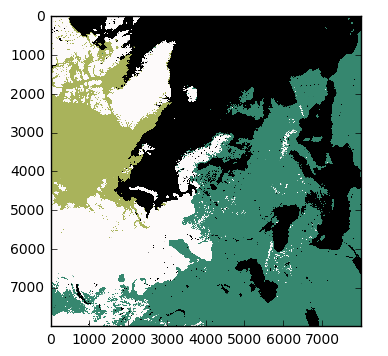

In [83]:
#Try to subset the data
#Good start
min_ind_lons=11000
max_ind_lons=19000
min_ind_lats=9000
max_ind_lats=17000

data_subset=data[min_ind_lats:max_ind_lats,min_ind_lons:max_ind_lons]
lats_subset=lats[min_ind_lats:max_ind_lats,min_ind_lons:max_ind_lons]
lons_subset=lons[min_ind_lats:max_ind_lats,min_ind_lons:max_ind_lons]
plt.imshow(data_subset, cmap='gist_earth')
plt.show()

In [ ]:
# Plots for 1 km grid
# Large Europe
# bmap = Basemap(projection="stere", lon_0=20, lat_0=55, boundinglat=0,\
#                 rsphere=6378160.0, ellps="WGS84",k_0=0.9330127018922193,\
#                 width=6000000,height=4000000, resolution='i')
# Central Europe
bmap = Basemap(projection="stere", lon_0=10, lat_0=45, boundinglat=0,\
                rsphere=6378160.0, ellps="WGS84",k_0=0.9330127018922193,\
                width=3000000,height=2000000, resolution='i')
# Italy
# bmap = Basemap(projection="stere", lon_0=12, lat_0=43, boundinglat=0,\
#                 rsphere=6378160.0, ellps="WGS84",k_0=0.9330127018922193,\
#                 width=1500000,height=1500000, resolution='i')
# Alps
# bmap = Basemap(projection="stere", lon_0=12, lat_0=45.8, boundinglat=0,\
#                 rsphere=6378160.0, ellps="WGS84",k_0=0.9330127018922193,\
#                 width=1200000,height=500000, resolution='i')
# x,y=bmap(lons_subset, lats_subset)

levels=np.array([0,1,2,3,4,5])

bmap.contourf(x, y, data_subset, levels=levels, colors=('blue', 'darkgreen','cyan','white'), extend='min')
cbar=bmap.colorbar(location='right')
cbar.set_ticklabels(['Ocean','Land','Ice','Snow'])

cbar.ax.set_xticklabels(['Water','Land','Ice','Snow']) 
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='black')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='black')
# labels = [left,right,top,bottom]
bmap.drawparallels(np.arange(-80.,81.,10.),linewidth=0.2,labels=[True, False, False, True])
bmap.drawmeridians(np.arange(-180.,181.,10.),linewidth=0.2,labels=[True, False, False, True])
bmap.readshapefile('shapefiles/ITA_adm_shp/ITA_adm1','ITA_adm1',linewidth=0.5,color='black')

# DPI = 200
# plt.savefig('snow/image_it', dpi=DPI, bbox_inches='tight')

plt.show()

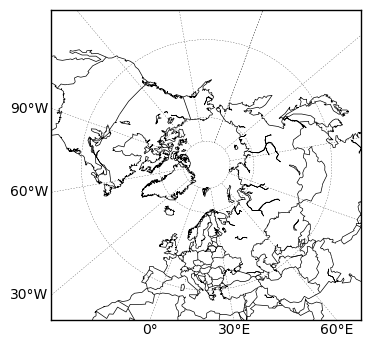

In [23]:
plt.close()
bmap = Basemap(projection="npstere", lon_0=20, lat_0=90, boundinglat=30,\
               rsphere=6378160.0, ellps="WGS84",k_0=0.9330127018922193)
bmap.drawcoastlines(linewidth=0.5, linestyle='solid', color='black')
bmap.drawcountries(linewidth=0.5, linestyle='solid', color='black')
bmap.drawparallels(np.arange(-80.,81.,30),linewidth=0.2,labels=[True, False, False, True])
bmap.drawmeridians(np.arange(-180.,181.,30),linewidth=0.2,labels=[True, False, False, True])

plt.show()

In [43]:
year=datetime.datetime.now().timetuple().tm_year
doy=datetime.datetime.now().timetuple().tm_yday-1
datetime.datetime.strptime(str(year)+str(doy),"%Y%j").strftime("%Y-%m-%d")

'2017-11-09'

TypeError: unsupported operand type(s) for +: 'int' and 'str'